In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Para poder leer y trabajar con los precios de las acciones
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# Para la fecha de los datos
from datetime import datetime


# Lista con el nombre de las acciones que vamos a utilizar
tech_list = ['AAPL', 'GOOG', 'MSFT', 'META']

# Defininimos qué fechas queremos de los datos
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start ="2012-01-01", end = "2024-01-05")
    

company_list = [AAPL, GOOG, MSFT, META]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "META"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-12-20,348.649994,354.959991,347.790009,349.279999,348.909790,16369900,META
2023-12-21,352.980011,356.410004,349.209991,354.089996,353.714691,15289600,META
2023-12-22,355.579987,357.200012,351.220001,353.390015,353.015472,11764200,META
2023-12-26,354.989990,356.980011,353.450012,354.829987,354.453918,9898600,META
2023-12-27,356.070007,359.000000,355.309998,357.829987,357.450714,13207900,META
2023-12-28,359.700012,361.899994,357.809998,358.320007,357.940216,11798800,META
2023-12-29,358.989990,360.000000,351.820007,353.959991,353.584839,14980500,META
2024-01-02,351.320007,353.160004,340.010010,346.290009,345.922974,19042200,META
2024-01-03,344.980011,347.950012,343.179993,344.470001,344.104889,15451100,META


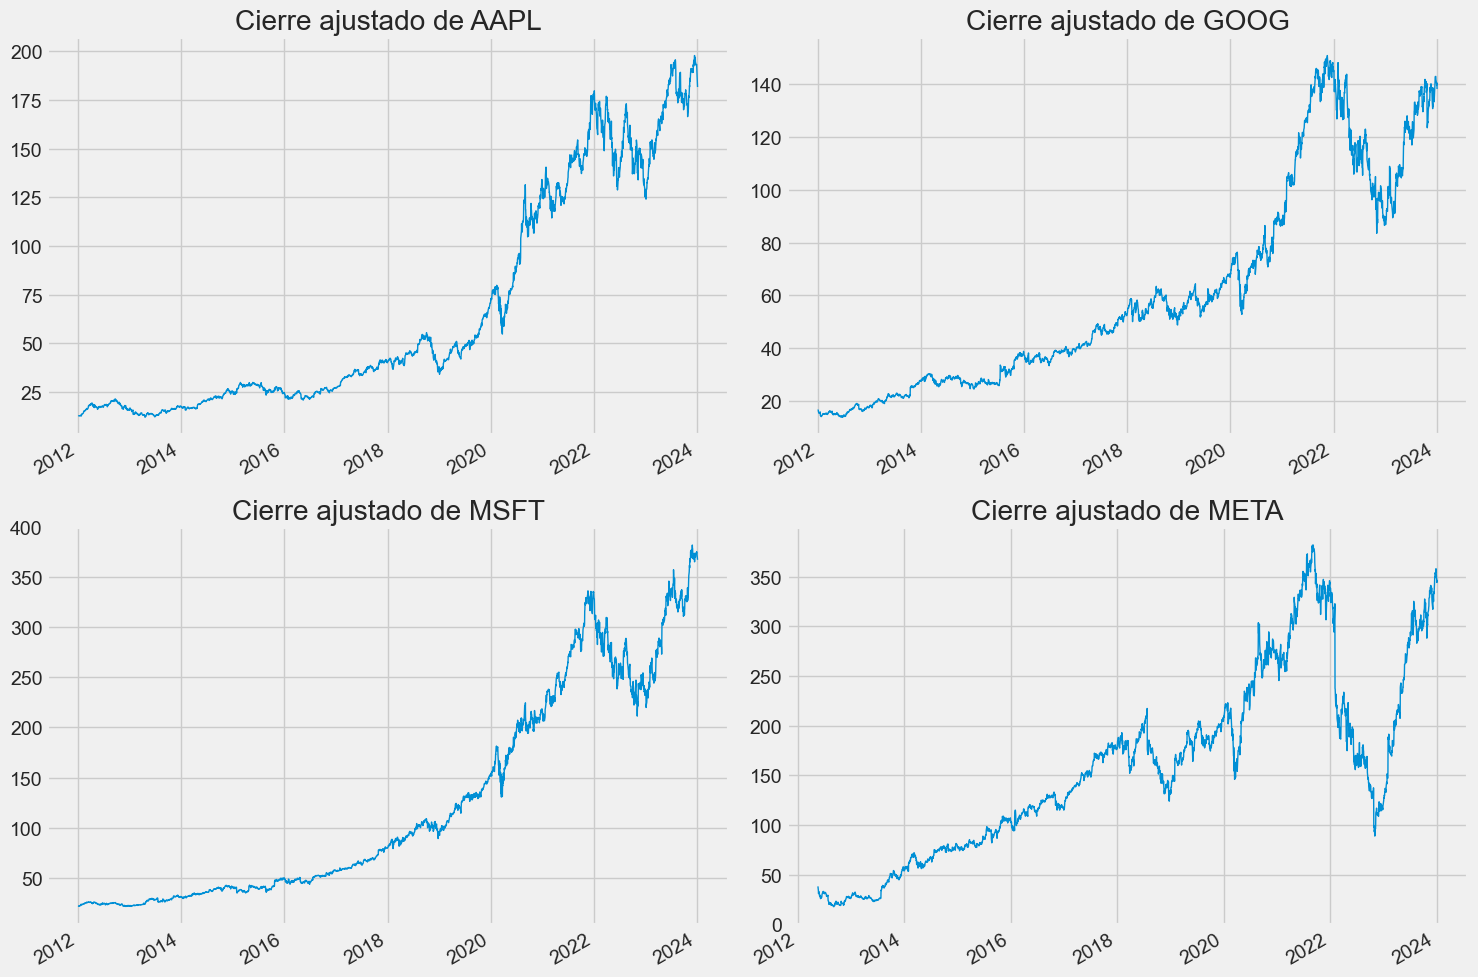

In [10]:
#Graficamos los precios de las acciones de este último año
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(linewidth = 1)
    
    plt.xlabel(None)
    plt.title(f"Cierre ajustado de {tech_list[i - 1]}")
    
plt.tight_layout()

[*********************100%%**********************]  4 of 4 completed


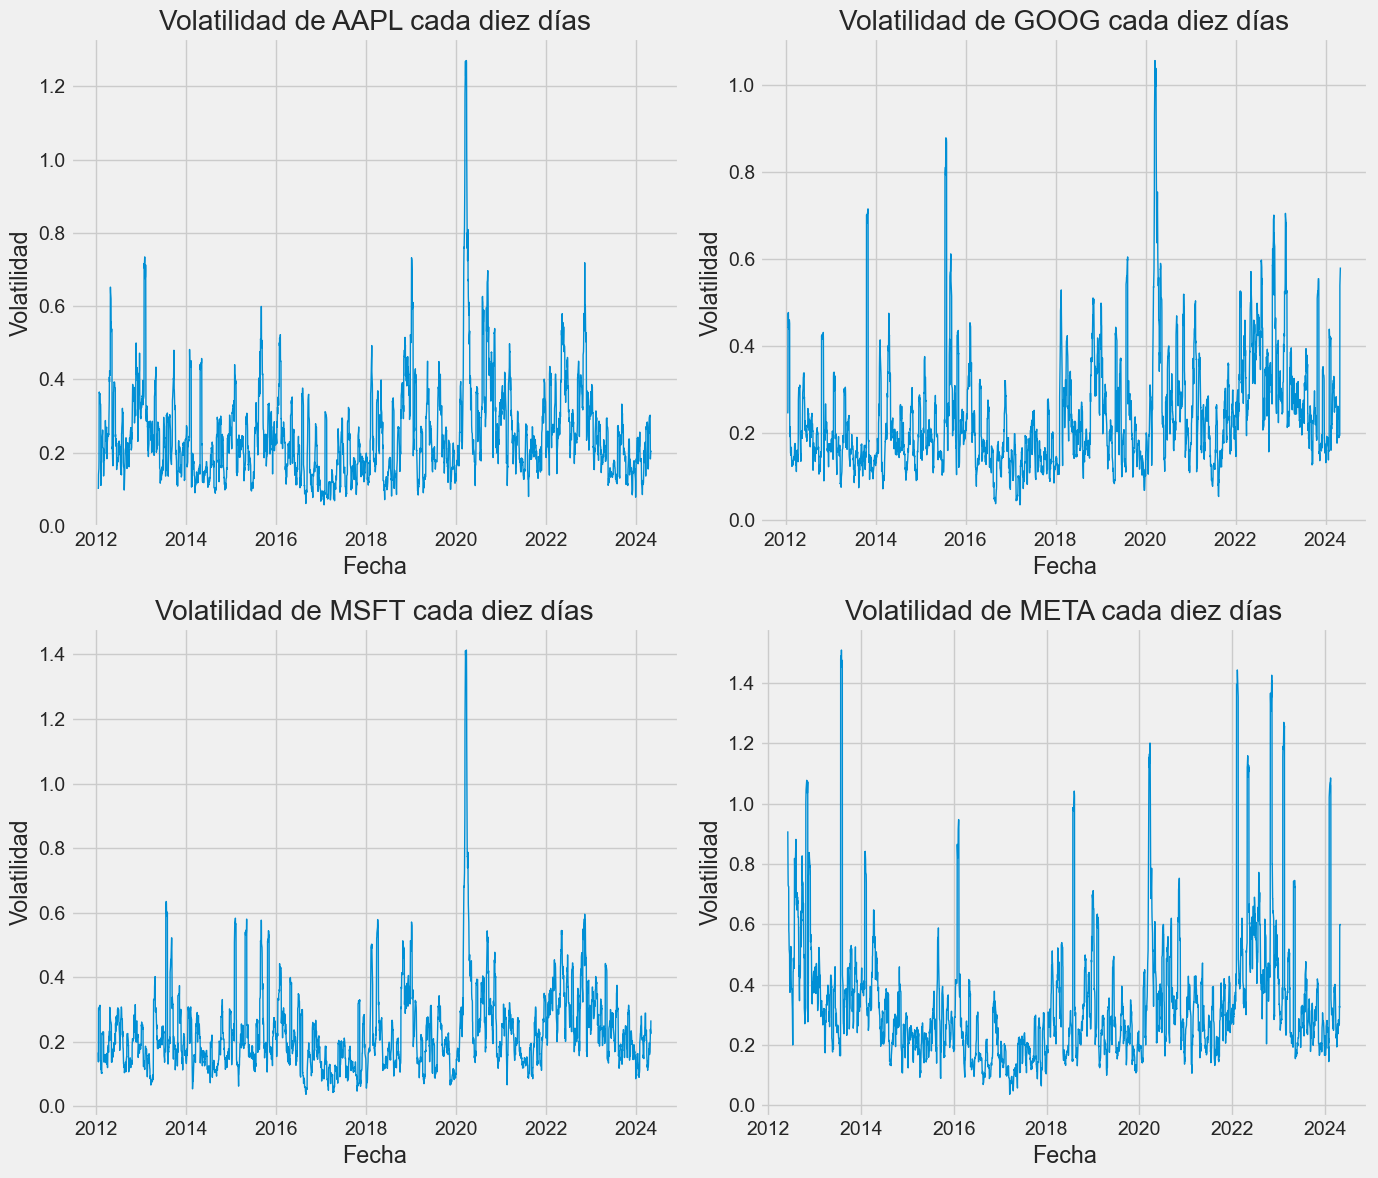

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

# Lista de tickers de las empresas
tickers = ["AAPL", "GOOG", "MSFT", "META"]

# Obtener los datos de precios de las acciones para el último año
start_date = "2012-01-01"
end_date = "2024-05-01"

data = yf.download(tickers, start=start_date, end=end_date)

# Calcular los retornos diarios
returns = data["Adj Close"].pct_change()

# Calcular la volatilidad para cada diez días
volatility_10_days = returns.rolling(window=10).std() * (252 ** 0.5)  # Ventana de 10 días, asumiendo 252 días hábiles en un año

# Crear subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Graficar la volatilidad para cada empresa en subgráficos separados
for i, ticker in enumerate(tickers):
    row = i // 2
    col = i % 2
    axes[row, col].plot(volatility_10_days[ticker], linewidth=1)
    axes[row, col].set_title(f'Volatilidad de {ticker} cada diez días')
    axes[row, col].set_xlabel('Fecha')
    axes[row, col].set_ylabel('Volatilidad')

plt.tight_layout()
plt.show()

[*********************100%%**********************]  4 of 4 completed

Volatilidad anualizada:
AAPL: 0.20
GOOG: 0.29
MSFT: 0.36
META: 0.21


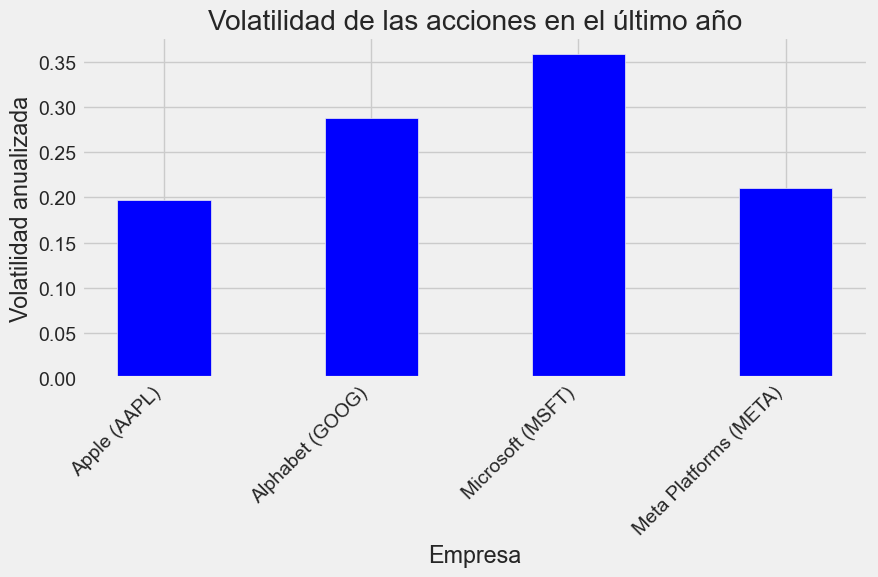

In [7]:
import yfinance as yf

# Lista de tickers de las empresas
tickers = ["AAPL", "GOOG", "MSFT", "META"]

# Obtener los datos de precios de las acciones para el último año
start_date = "2023-05-01"
end_date = "2024-05-01"

data = yf.download(tickers, start=start_date, end=end_date)

# Calcular los retornos diarios
returns = data["Adj Close"].pct_change()

# Calcular la volatilidad anualizada asumiendo 252 días hábiles
volatility = returns.std() * (252 ** 0.5)  

print("Volatilidad anualizada:")
for ticker, vol in zip(tickers, volatility):
    print(f"{ticker}: {vol:.2f}")

import matplotlib.pyplot as plt

# Lista de nombres de empresas
companies = ["Apple (AAPL)", "Alphabet (GOOG)", "Microsoft (MSFT)", "Meta Platforms (META)"]

# Crear un gráfico de barras para visualizar la volatilidad
plt.figure(figsize=(9, 6))
plt.bar(companies, volatility, color='blue', width=0.45)  
plt.title('Volatilidad de las acciones en el último año')
plt.xlabel('Empresa')
plt.ylabel('Volatilidad anualizada')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

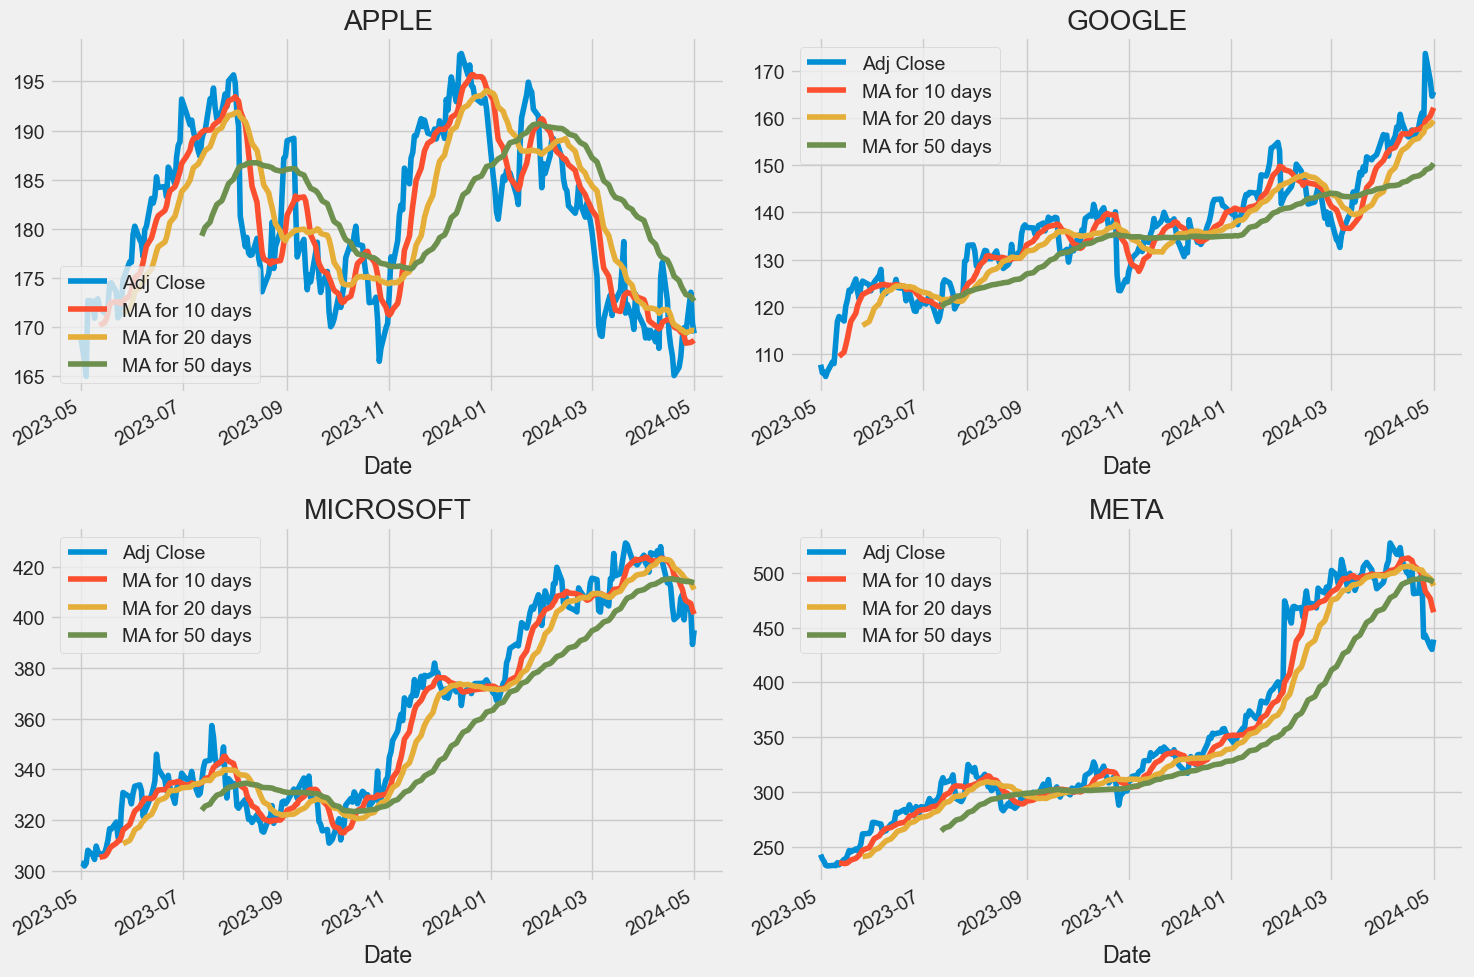

In [80]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('META')

fig.tight_layout()

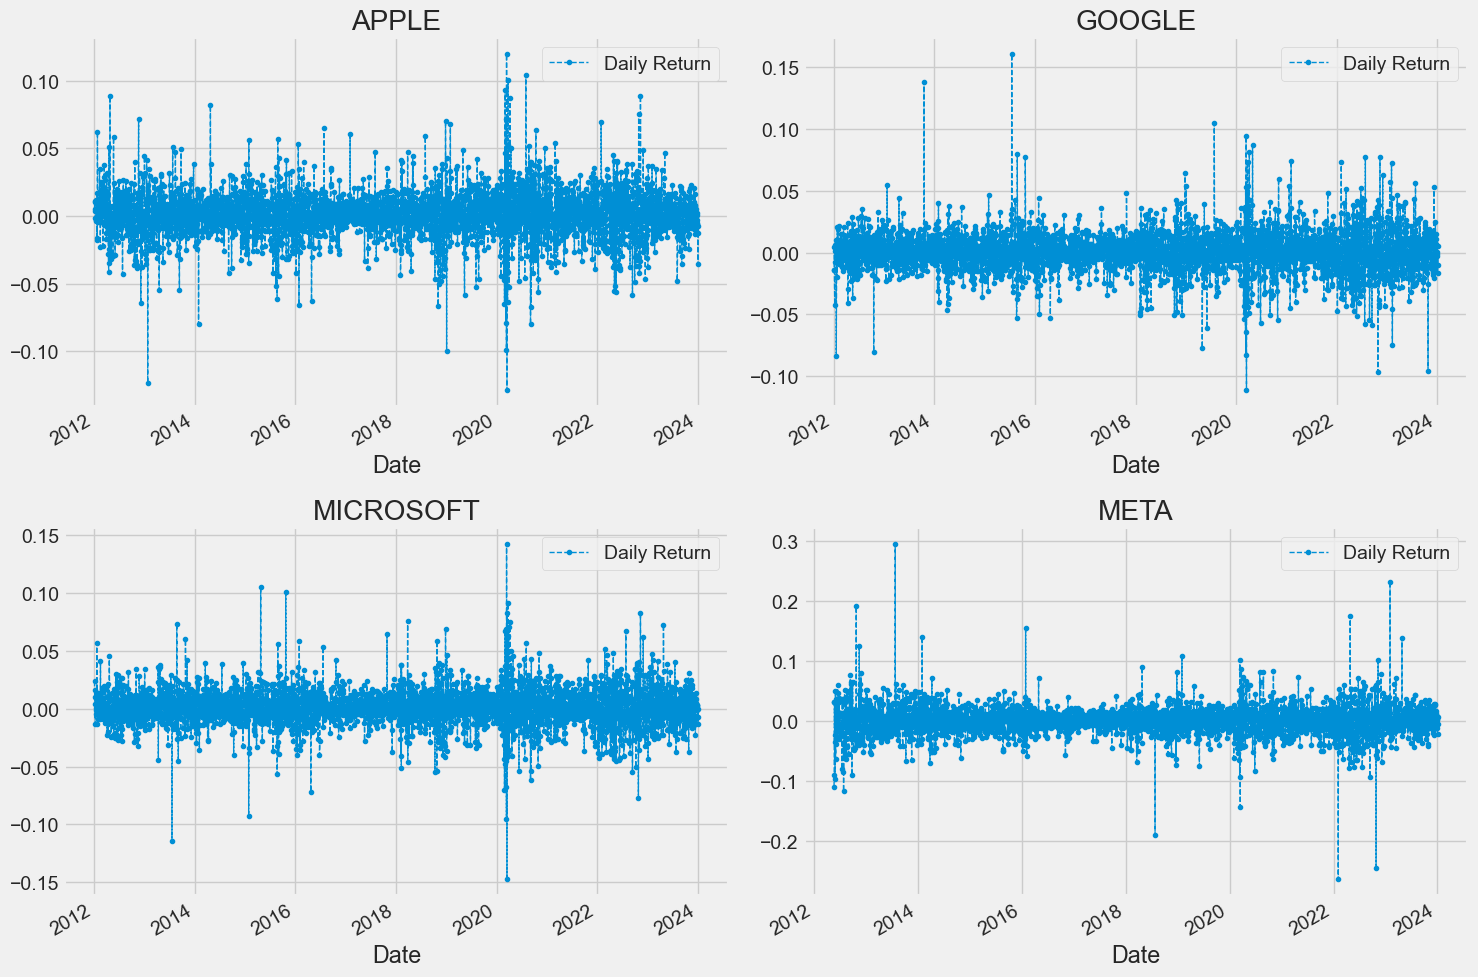

In [8]:
# Usamos pct_change para encontrar el porcentaje de cambio en el precio cada día
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Graficamos
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='.', linewidth=1)
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='.', linewidth=1)
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='.', linewidth=1)
axes[1,0].set_title('MICROSOFT')

META['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='.', linewidth=1)
axes[1,1].set_title('META')

fig.tight_layout()

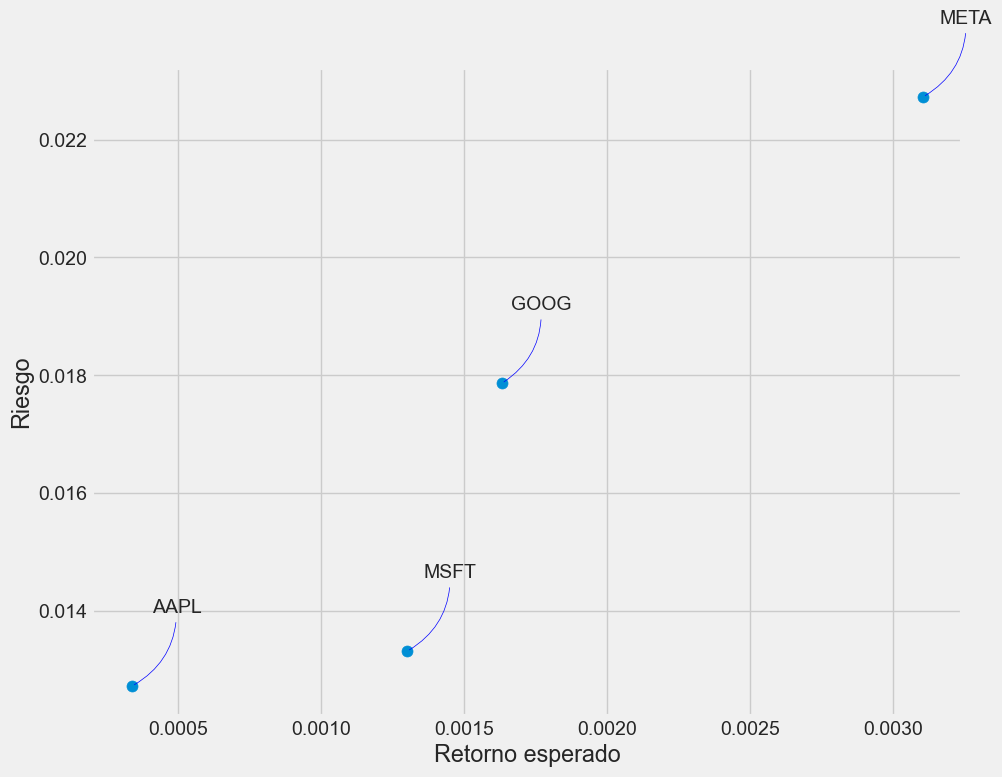

In [6]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Retorno esperado')
plt.ylabel('Riesgo')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predicción con LSTM

In [3]:
# Cargamos los datos de las acciones que queremos analizar y predecir
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416983,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483713,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622309,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754258,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734027,394024400
...,...,...,...,...,...,...
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800
2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600
2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000


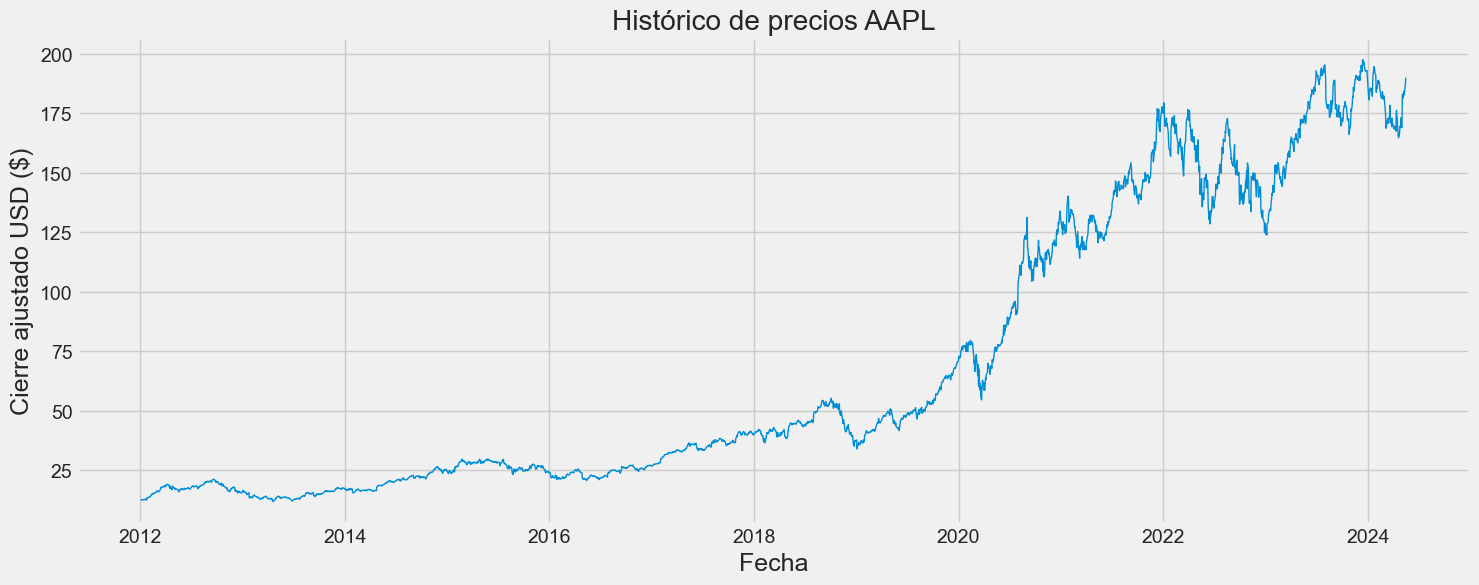

In [4]:
#Hacemos una gráfica con el histórico de precios
plt.figure(figsize=(16,6))
plt.title('Histórico de precios AAPL')
plt.plot(df['Adj Close'], linewidth = 1)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre ajustado USD ($)', fontsize=18)
plt.show()

In [5]:
# Creamos un nuevo DataFrame con únicamente la columna Adj Close 
data = df.filter(['Adj Close'])
# Convertimos el dataframe en un numpy array
dataset = data.values
# Número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2959

In [6]:
# Escalamos y normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00242952],
       [0.00278902],
       [0.00353566],
       ...,
       [0.95760493],
       [0.95825137],
       [0.95841298]])

In [7]:
# Creamos el data set para entrenamiento con los datos escalados
train_data = scaled_data[0:int(training_data_len), :]
# Separamos los datos entre x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convertimos x_train y y_train en numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Cambiamos la forma de los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00242952, 0.00278902, 0.00353566, 0.00424651, 0.00413752,
       0.00438316, 0.00427091, 0.0040822 , 0.0038252 , 0.00462065,
       0.00533801, 0.00511677, 0.00390492, 0.00506149, 0.00392281,
       0.00819283, 0.00786259, 0.00829366, 0.00922574, 0.0097902 ,
       0.00974301, 0.00956897, 0.0103107 , 0.01100855, 0.01179914,
       0.01307605, 0.01575844, 0.01579909, 0.01729238, 0.01840826,
       0.01649044, 0.01722893, 0.01721427, 0.01928502, 0.01899058,
       0.01953552, 0.02051477, 0.02105974, 0.02262947, 0.023773  ,
       0.02410324, 0.02421869, 0.02226349, 0.02179174, 0.02186169,
       0.02369983, 0.02421709, 0.02532813, 0.02794702, 0.03144112,
       0.03078715, 0.03078883, 0.033315  , 0.03410559, 0.03354275,
       0.03302875, 0.03249354, 0.0342715 , 0.03549148, 0.0360023 ])]
[0.034739983147894324]

[array([0.00242952, 0.00278902, 0.00353566, 0.00424651, 0.00413752,
       0.00438316, 0.00427091, 0.0040822 , 0.0038252 , 0.00462065,
       0.00533801, 0.00511677, 0.0

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Creamos el modelo LSTM
model = Sequential()

# Añadimos capas LSTM con 50 unidades
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
# Añadimos una capa densa con 25 unidades
model.add(Dense(25))
# Añadir una capa de salida densa con 1 unidad
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creamos el conjunto de datos de prueba
test_data = scaled_data[training_data_len - 60: , :]
# Creamos los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convertimos a un numpy array
x_test = np.array(x_test)

# Cambiamos la forma de los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Obtención de las predicciones
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculamos el RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("Root Mean Square Error:",rmse)

# Calcular el NRMSE
range_y = np.max(y_test) - np.min(y_test)
nrmse = rmse / range_y
print("Normalized Root Mean Square Error (NRMSE):", nrmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2899/2899 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0021
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Root Mean Square Error: 4.225860178279189
Normalized Root Mean Square Error (NRMSE): 0.1287860834806857
Mean Absolute Error: 3.4758476995652723
Coeficiente de determinación (R cuadrado): 0.7764756512759355


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14880\3264202307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


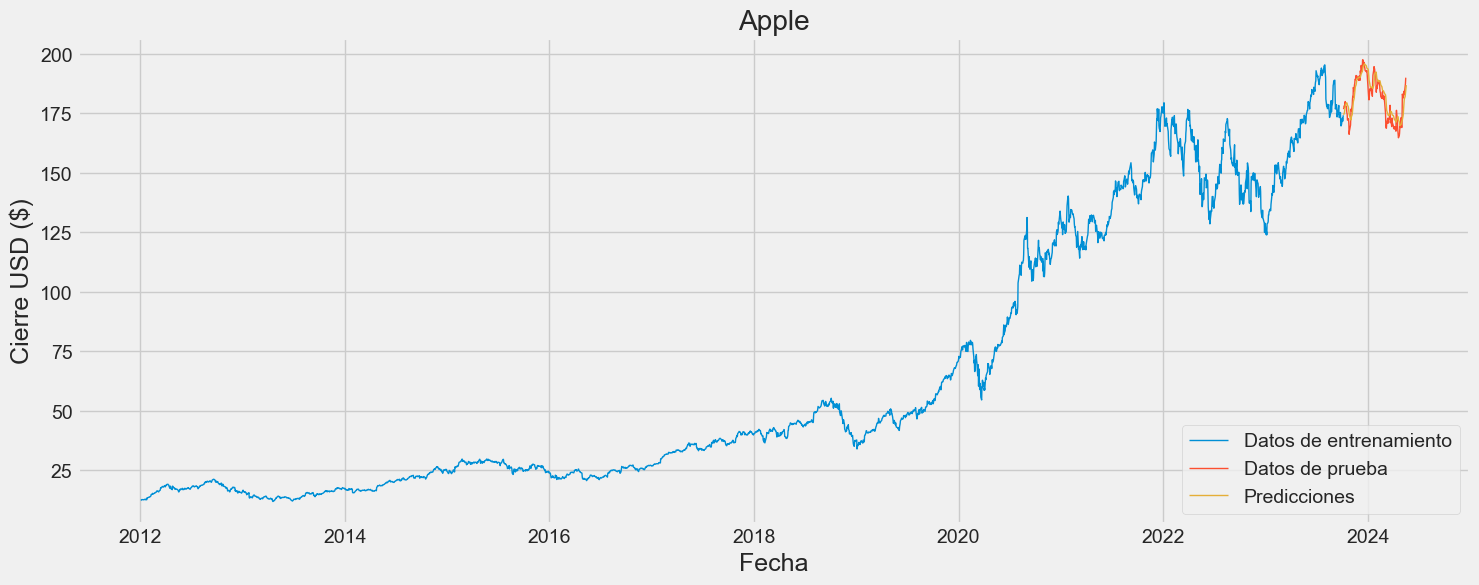

In [12]:
# Graficamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Apple')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre USD ($)', fontsize=18)
plt.plot(train['Adj Close'], linewidth = 1)
plt.plot(valid[['Adj Close', 'Predictions']], linewidth = 1)
plt.legend(['Datos de entrenamiento', 'Datos de prueba', 'Predicciones'], loc='lower right')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14880\682196135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


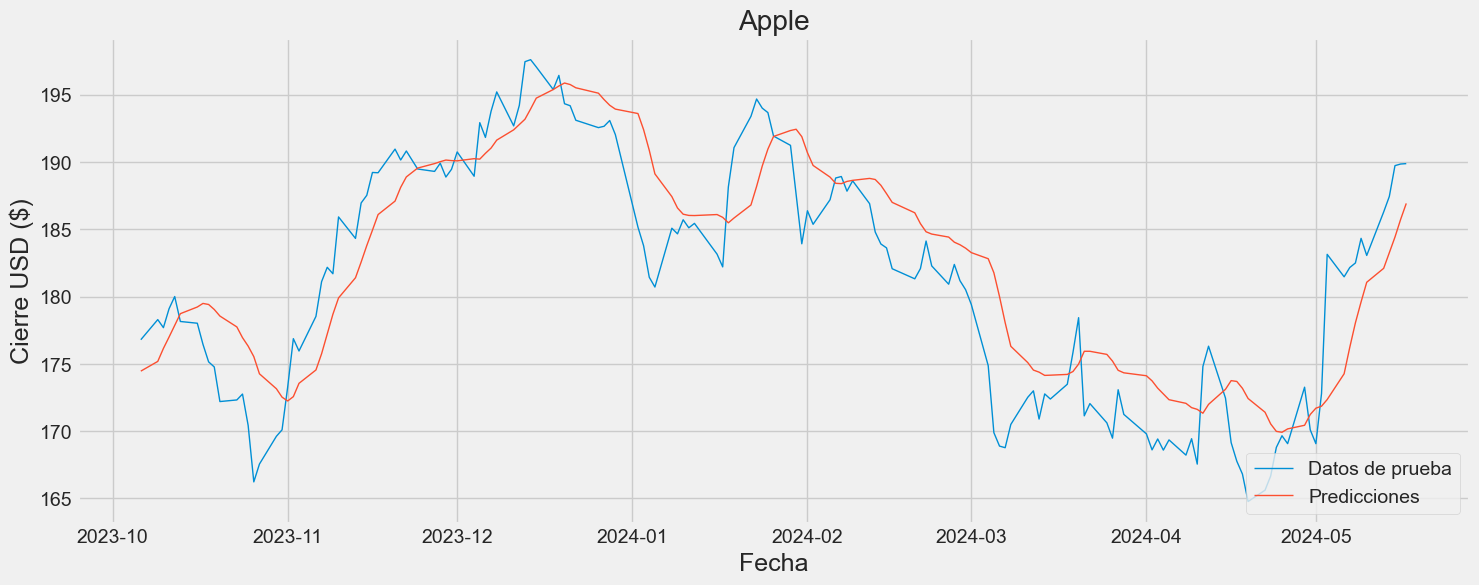

In [13]:
# Separar los datos de prueba
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Graficar los datos de prueba y las predicciones
plt.figure(figsize=(16, 6))
plt.title('Apple')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre USD ($)', fontsize=18)
plt.plot(valid['Adj Close'], linewidth=1, label='Datos de prueba')
plt.plot(valid['Predictions'], linewidth=1, label='Predicciones')
plt.legend(loc='lower right')
plt.show()

In [14]:
# Cargamos los datos de las acciones que queremos analizar y predecir
df = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2024-05-13,165.847000,170.949997,165.759995,170.899994,170.899994,19648600
2024-05-14,171.589996,172.779999,170.419998,171.929993,171.929993,18729500
2024-05-15,172.300003,174.046005,172.029999,173.880005,173.880005,20958200


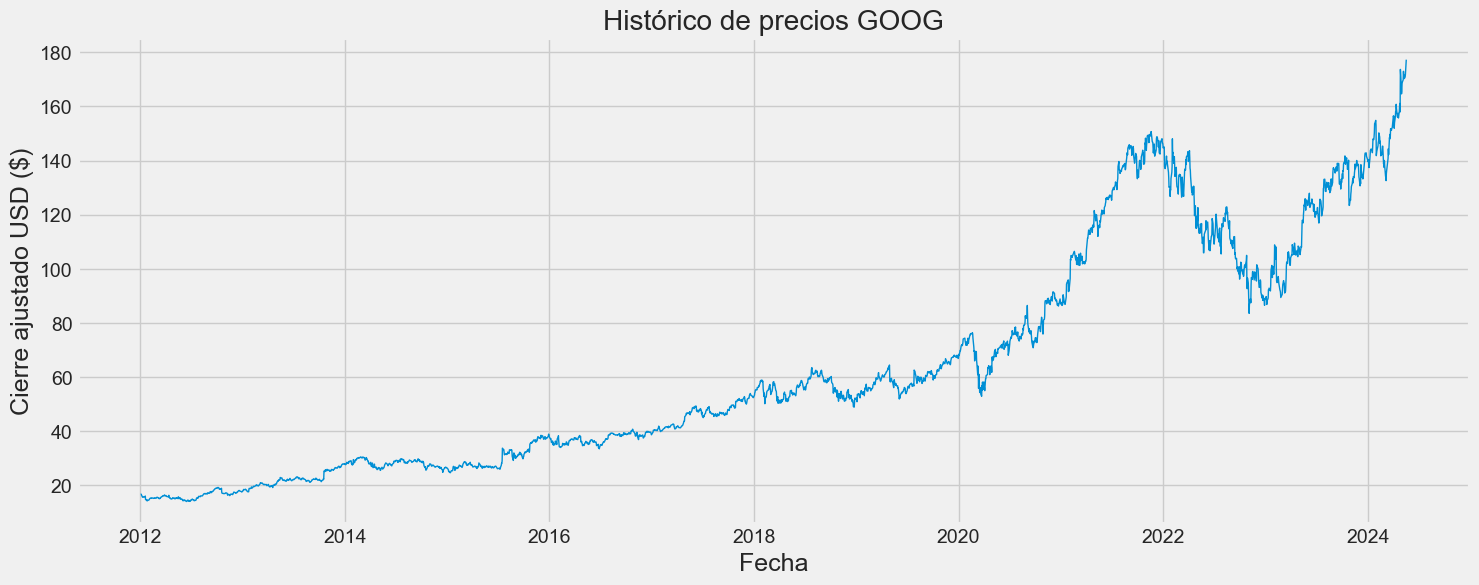

In [15]:
#Hacemos una gráfica con el histórico de precios
plt.figure(figsize=(16,6))
plt.title('Histórico de precios GOOG')
plt.plot(df['Adj Close'], linewidth = 1)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre ajustado USD ($)', fontsize=18)
plt.show()

In [16]:
# Creamos un nuevo DataFrame con únicamente la columna Adj Close 
data = df.filter(['Adj Close'])
# Convertimos el dataframe en un numpy array
dataset = data.values
# Número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2959

In [17]:
# Escalamos y normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.01621556],
       [0.01665312],
       [0.01523982],
       ...,
       [0.97912669],
       [0.98861451],
       [1.        ]])

In [18]:

# Creamos el data set para entrenamiento con los datos escalados
train_data = scaled_data[0:int(training_data_len), :]
# Separamos los datos entre x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convertimos x_train y y_train en numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Cambiamos la forma de los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.01621556, 0.01665312, 0.01523982, 0.01386922, 0.00966744,
       0.00977111, 0.01020105, 0.01076209, 0.01005316, 0.01060049,
       0.01126064, 0.01227602, 0.00410725, 0.0040356 , 0.00333581,
       0.00159168, 0.00137975, 0.00319097, 0.00284184, 0.00321079,
       0.00332056, 0.00397309, 0.00568368, 0.00762906, 0.00727536,
       0.00774493, 0.00799039, 0.00714424, 0.00810321, 0.00773121,
       0.00709088, 0.00723724, 0.00695062, 0.00837763, 0.00745373,
       0.00717473, 0.00775255, 0.0076626 , 0.00904693, 0.00902559,
       0.00965829, 0.00948296, 0.00841575, 0.0069994 , 0.00727993,
       0.00733177, 0.00628132, 0.00702837, 0.00895393, 0.00868103,
       0.00946468, 0.01006079, 0.01142377, 0.01134907, 0.01233852,
       0.01326395, 0.01273645, 0.01376402, 0.01341184, 0.01474433])]
[0.013623760824461206]

[array([0.01621556, 0.01665312, 0.01523982, 0.01386922, 0.00966744,
       0.00977111, 0.01020105, 0.01076209, 0.01005316, 0.01060049,
       0.01126064, 0.01227602, 0.0

In [19]:

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Creamos el modelo LSTM
model = Sequential()

# Añadimos capas LSTM con 50 unidades
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
# Añadimos una capa densa con 25 unidades
model.add(Dense(25))
# Añadir una capa de salida densa con 1 unidad
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creamos el conjunto de datos de prueba
test_data = scaled_data[training_data_len - 60: , :]
# Creamos los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convertimos a un numpy array
x_test = np.array(x_test)

# Cambiamos la forma de los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Obtención de las predicciones
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculamos el RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("Root Mean Square Error:",rmse)

# Calcular el NRMSE
range_y = np.max(y_test) - np.min(y_test)
nrmse = rmse / range_y
print("Normalized Root Mean Square Error (NRMSE):", nrmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2899/2899 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0018
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F46CF6D4E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Root Mean Square Error: 3.914599464549233
Normalized Root Mean Square Error (NRMSE): 0.07264056528278061
Mean Absolute Error: 3.0229774721

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14880\1792779524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


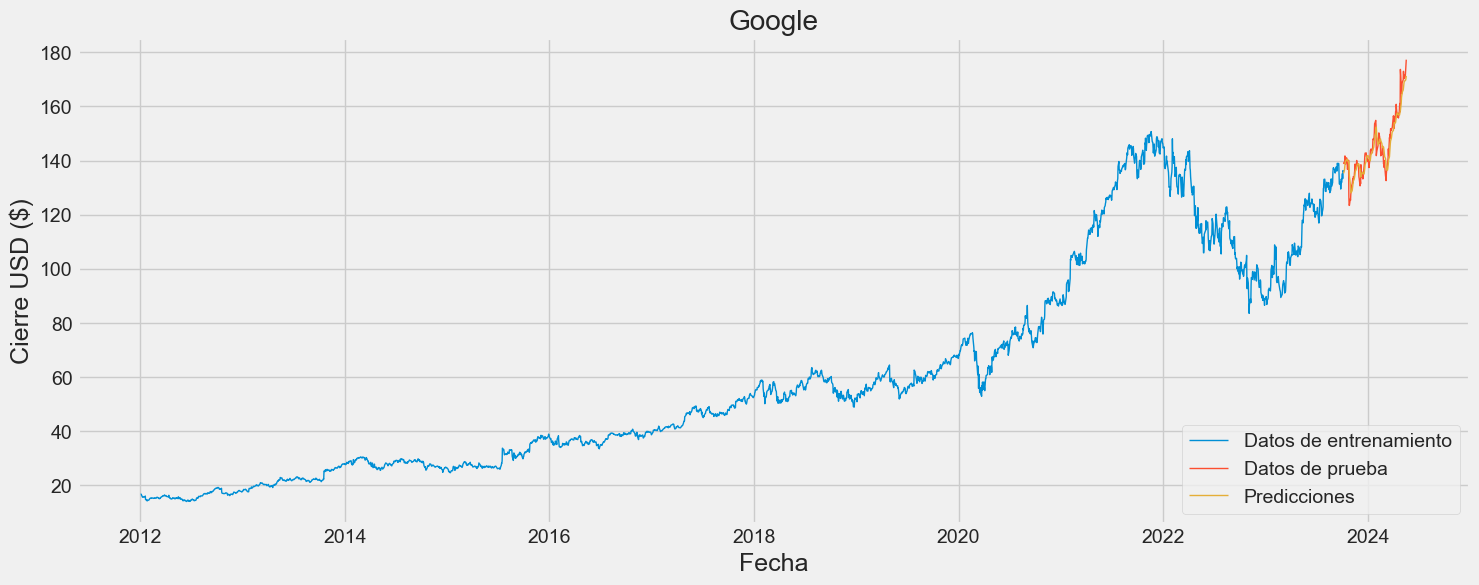

In [20]:

# Graficamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Google')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre USD ($)', fontsize=18)
plt.plot(train['Adj Close'], linewidth = 1)
plt.plot(valid[['Adj Close', 'Predictions']], linewidth = 1)
plt.legend(['Datos de entrenamiento', 'Datos de prueba', 'Predicciones'], loc='lower right')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14880\549889742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


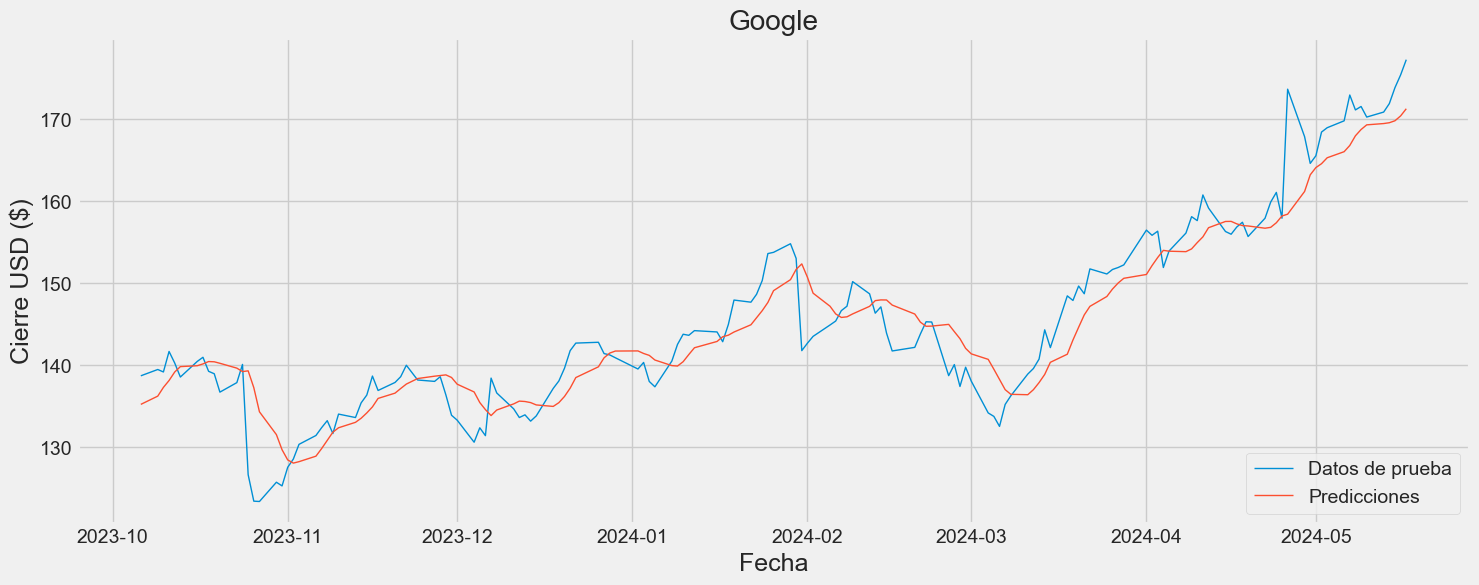

In [21]:
# Separar los datos de prueba
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Graficar los datos de prueba y las predicciones
plt.figure(figsize=(16, 6))
plt.title('Google')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre USD ($)', fontsize=18)
plt.plot(valid['Adj Close'], linewidth=1, label='Datos de prueba')
plt.plot(valid['Predictions'], linewidth=1, label='Predicciones')
plt.legend(loc='lower right')
plt.show()

In [22]:
# Cargamos los datos de las acciones que queremos analizar y predecir
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())

df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.200520,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.699444,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.921188,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.261730,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,21.968702,59706800
...,...,...,...,...,...,...
2024-05-13,418.010010,418.350006,410.820007,413.720001,412.975098,15440200
2024-05-14,412.019989,417.489990,411.549988,416.559998,415.809998,15109300
2024-05-15,417.899994,423.809998,417.269989,423.079987,423.079987,22239500


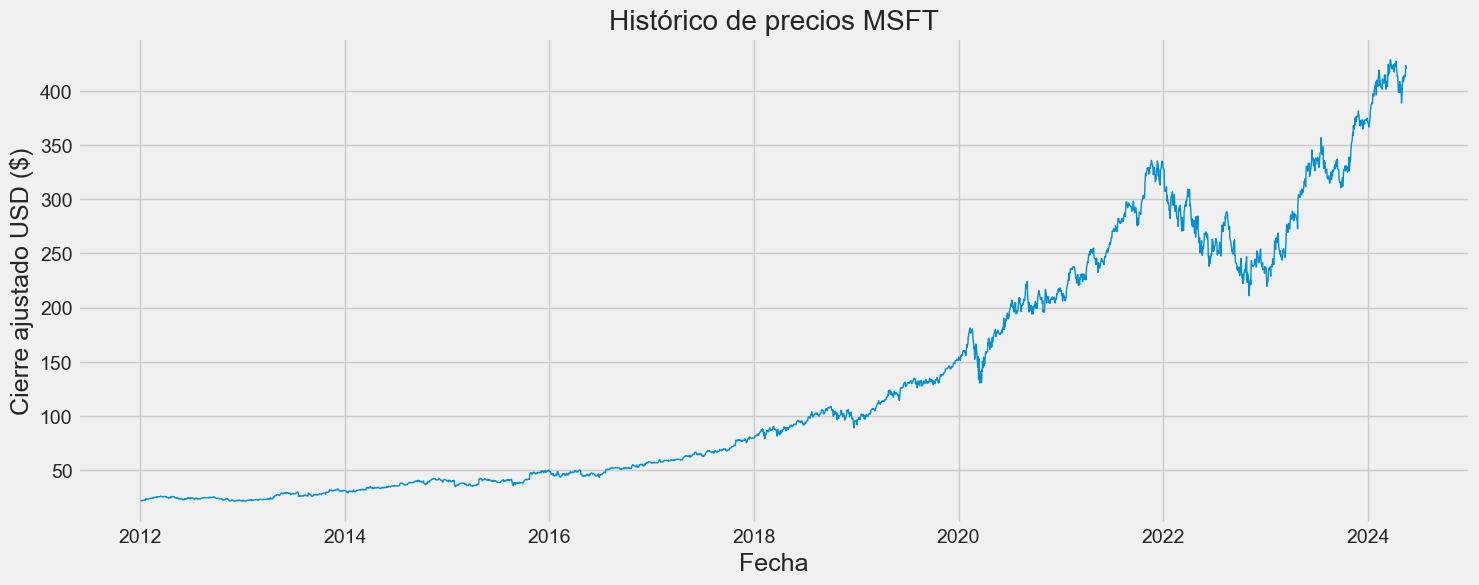

In [23]:

#Hacemos una gráfica con el histórico de precios
plt.figure(figsize=(16,6))
plt.title('Histórico de precios MSFT')
plt.plot(df['Adj Close'], linewidth = 1)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre ajustado USD ($)', fontsize=18)
plt.show()


In [24]:

# Creamos un nuevo DataFrame con únicamente la columna Adj Close 
data = df.filter(['Adj Close'])
# Convertimos el dataframe en un numpy array
dataset = data.values
# Número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2959

In [25]:
# Escalamos y normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.        ],
       [0.00122467],
       [0.00176896],
       ...,
       [0.98645806],
       [0.98132793],
       [0.97941334]])

In [26]:

# Creamos el data set para entrenamiento con los datos escalados
train_data = scaled_data[0:int(training_data_len), :]
# Separamos los datos entre x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convertimos x_train y y_train en numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Cambiamos la forma de los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.        , 0.00122467, 0.00176896, 0.00260486, 0.00188559,
       0.00207998, 0.00184672, 0.002391  , 0.002877  , 0.00289645,
       0.00283814, 0.00262427, 0.00571513, 0.00575403, 0.00499588,
       0.00542357, 0.00530691, 0.00478206, 0.00552075, 0.00536523,
       0.00606504, 0.00618169, 0.00674543, 0.00666769, 0.00695926,
       0.00756189, 0.0077757 , 0.00725084, 0.00740636, 0.00715199,
       0.00676064, 0.00918698, 0.00910872, 0.00948049, 0.00914783,
       0.00934351, 0.00955876, 0.00930439, 0.01032189, 0.0100675 ,
       0.0111437 , 0.0107328 , 0.01018491, 0.00971529, 0.01026318,
       0.01059584, 0.0105567 , 0.01065454, 0.01188726, 0.01208295,
       0.01223948, 0.0117503 , 0.01096761, 0.0105567 , 0.01040015,
       0.01057625, 0.01059584, 0.01173073, 0.01159376, 0.01094803])]
[0.010811063577416284]

[array([0.        , 0.00122467, 0.00176896, 0.00260486, 0.00188559,
       0.00207998, 0.00184672, 0.002391  , 0.002877  , 0.00289645,
       0.00283814, 0.00262427, 0.0

In [27]:

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Creamos el modelo LSTM
model = Sequential()

# Añadimos capas LSTM con 50 unidades
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
# Añadimos una capa densa con 25 unidades
model.add(Dense(25))
# Añadir una capa de salida densa con 1 unidad
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creamos el conjunto de datos de prueba
test_data = scaled_data[training_data_len - 60: , :]
# Creamos los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convertimos a un numpy array
x_test = np.array(x_test)

# Cambiamos la forma de los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Obtención de las predicciones
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculamos el RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("Root Mean Square Error:",rmse)

# Calcular el NRMSE
range_y = np.max(y_test) - np.min(y_test)
nrmse = rmse / range_y
print("Normalized Root Mean Square Error (NRMSE):", nrmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2899/2899 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0012
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Root Mean Square Error: 10.859410012160629
Normalized Root Mean Square Error (NRMSE): 0.1046425412665281
Mean Absolute Error: 9.063875063004032
Coeficiente de determinación (R cuadrado): 0.8621789920178538


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14880\3267775332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


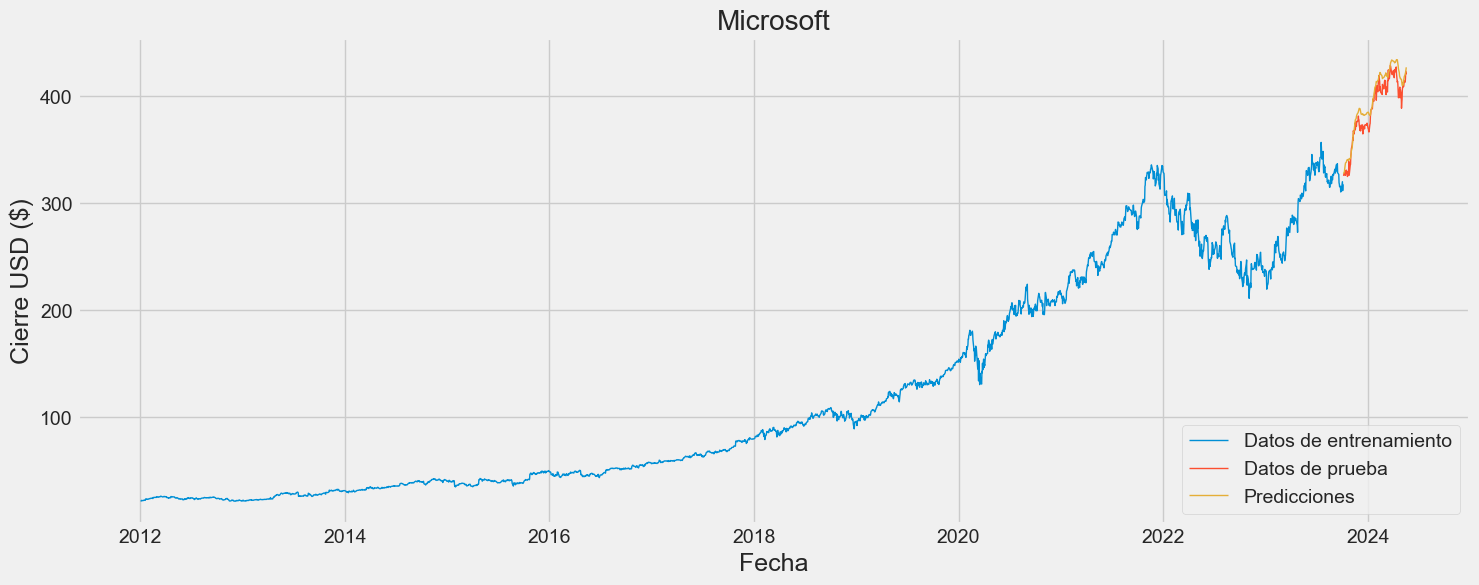

In [28]:
# Graficamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Microsoft')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre USD ($)', fontsize=18)
plt.plot(train['Adj Close'], linewidth = 1)
plt.plot(valid[['Adj Close', 'Predictions']], linewidth = 1)
plt.legend(['Datos de entrenamiento', 'Datos de prueba', 'Predicciones'], loc='lower right')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14880\1228714177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


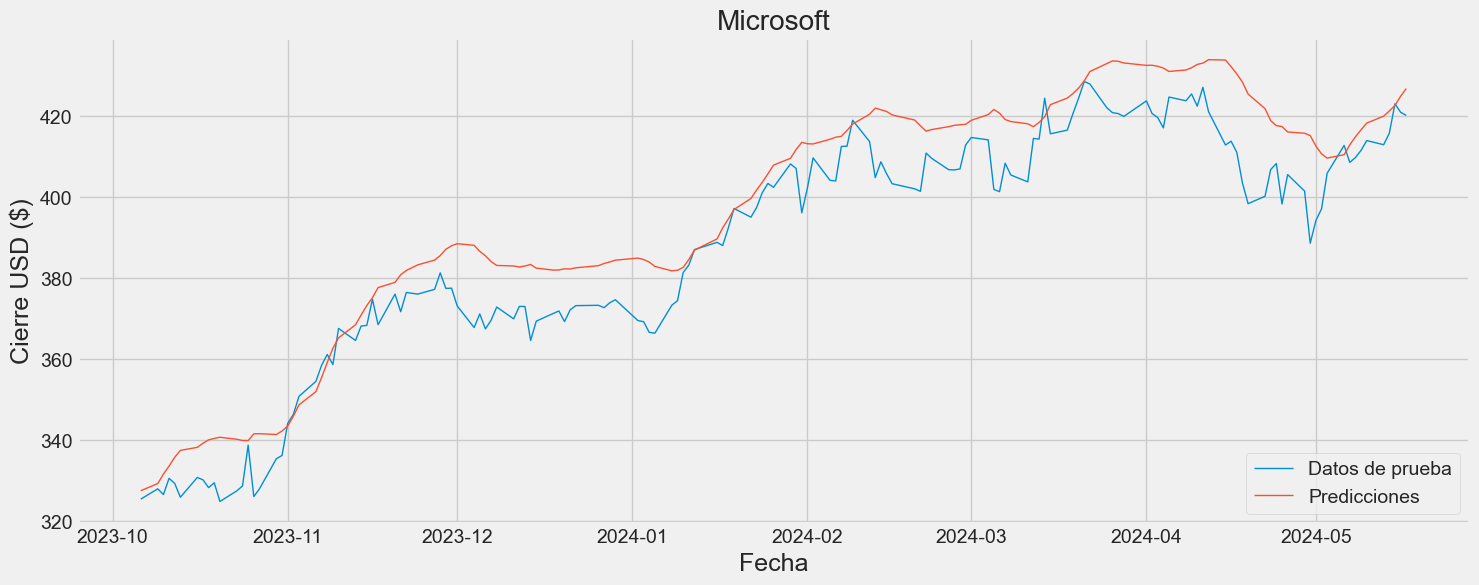

In [29]:
# Separar los datos de prueba
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Graficar los datos de prueba y las predicciones
plt.figure(figsize=(16, 6))
plt.title('Microsoft')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre USD ($)', fontsize=18)
plt.plot(valid['Adj Close'], linewidth=1, label='Datos de prueba')
plt.plot(valid['Predictions'], linewidth=1, label='Predicciones')
plt.legend(loc='lower right')
plt.show()

In [30]:
# Cargamos los datos de las acciones que queremos analizar y predecir
df = pdr.get_data_yahoo('META', start='2012-01-01', end=datetime.now())

df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.189480,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.993931,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.967144,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.966084,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.994991,50237200
...,...,...,...,...,...,...
2024-05-13,472.750000,473.350006,462.850006,468.010010,468.010010,14668800
2024-05-14,463.369995,472.540009,460.079987,471.850006,471.850006,10478600
2024-05-15,474.980011,482.500000,471.200012,481.540009,481.540009,13100500


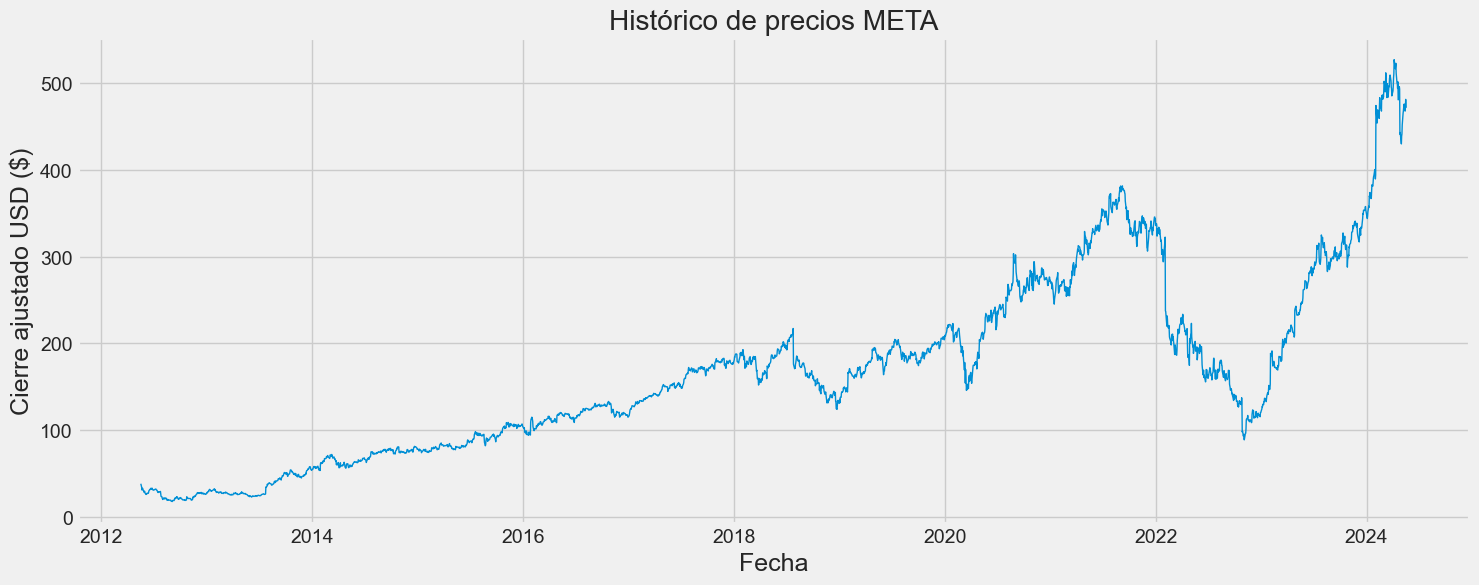

In [31]:


#Hacemos una gráfica con el histórico de precios
plt.figure(figsize=(16,6))
plt.title('Histórico de precios META')
plt.plot(df['Adj Close'], linewidth = 1)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre ajustado USD ($)', fontsize=18)
plt.show()


In [32]:


# Creamos un nuevo DataFrame con únicamente la columna Adj Close 
data = df.filter(['Adj Close'])
# Convertimos el dataframe en un numpy array
dataset = data.values
# Número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len


2869

In [33]:

# Escalamos y normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04018272],
       [0.03195016],
       [0.02601096],
       ...,
       [0.91013063],
       [0.89382465],
       [0.89123452]])

In [34]:
# Creamos el data set para entrenamiento con los datos escalados
train_data = scaled_data[0:int(training_data_len), :]
# Separamos los datos entre x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convertimos x_train y y_train en numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Cambiamos la forma de los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.04018272, 0.03195016, 0.02601096, 0.02797109, 0.02999003,
       0.02779468, 0.02177707, 0.02050299, 0.02326678, 0.01958172,
       0.01797442, 0.01595548, 0.017798  , 0.01681794, 0.01836644,
       0.01819003, 0.01895448, 0.01869966, 0.020699  , 0.02407043,
       0.02681462, 0.02779468, 0.02718704, 0.02765747, 0.03002923,
       0.0280887 , 0.03012723, 0.02842192, 0.02671661, 0.02620697,
       0.02556013, 0.02640299, 0.02693222, 0.02744186, 0.02830431,
       0.02693222, 0.02595215, 0.02563853, 0.02546212, 0.0206206 ,
       0.02030698, 0.02230631, 0.02209069, 0.02162026, 0.02160066,
       0.02101262, 0.02275714, 0.01787641, 0.01172159, 0.01062392,
       0.00780133, 0.00617442, 0.00452791, 0.00658605, 0.00821295,
       0.00586079, 0.00586079, 0.00642924, 0.00799734, 0.00758571])]
[0.0051943492946955536]

[array([0.04018272, 0.03195016, 0.02601096, 0.02797109, 0.02999003,
       0.02779468, 0.02177707, 0.02050299, 0.02326678, 0.01958172,
       0.01797442, 0.01595548, 0.

In [35]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Creamos el modelo LSTM
model = Sequential()

# Añadimos capas LSTM con 50 unidades
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
# Añadimos una capa densa con 25 unidades
model.add(Dense(25))
# Añadir una capa de salida densa con 1 unidad
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creamos el conjunto de datos de prueba
test_data = scaled_data[training_data_len - 60: , :]
# Creamos los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convertimos a un numpy array
x_test = np.array(x_test)

# Cambiamos la forma de los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Obtención de las predicciones
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculamos el RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("Root Mean Square Error:",rmse)

# Calcular el NRMSE
range_y = np.max(y_test) - np.min(y_test)
nrmse = rmse / range_y
print("Normalized Root Mean Square Error (NRMSE):", nrmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2809/2809 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 0.0016
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Root Mean Square Error: 18.694869492613222
Normalized Root Mean Square Error (NRMSE): 0.07812456748345288
Mean Absolute Error: 14.901309611002604
Coeficiente de determinación (R cuadrado): 0.9391195888533523


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14880\474930955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


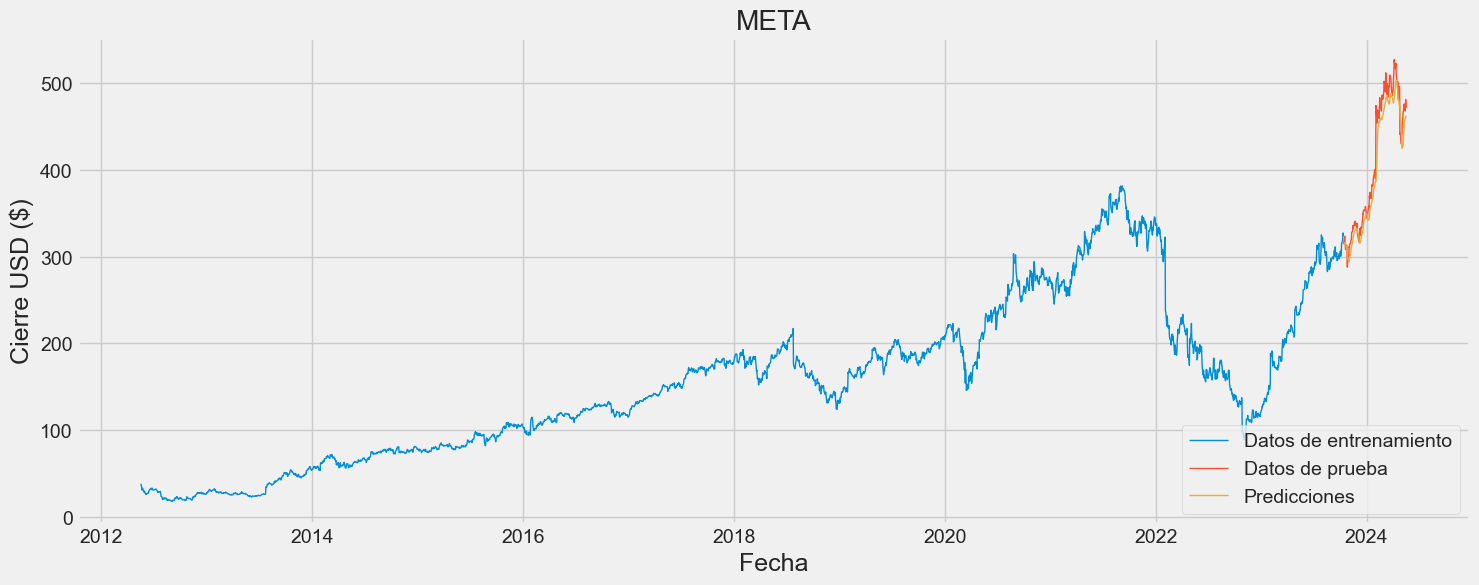

In [36]:
# Graficamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('META')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre USD ($)', fontsize=18)
plt.plot(train['Adj Close'], linewidth = 1)
plt.plot(valid[['Adj Close', 'Predictions']], linewidth = 1)
plt.legend(['Datos de entrenamiento', 'Datos de prueba', 'Predicciones'], loc='lower right')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14880\2918790472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


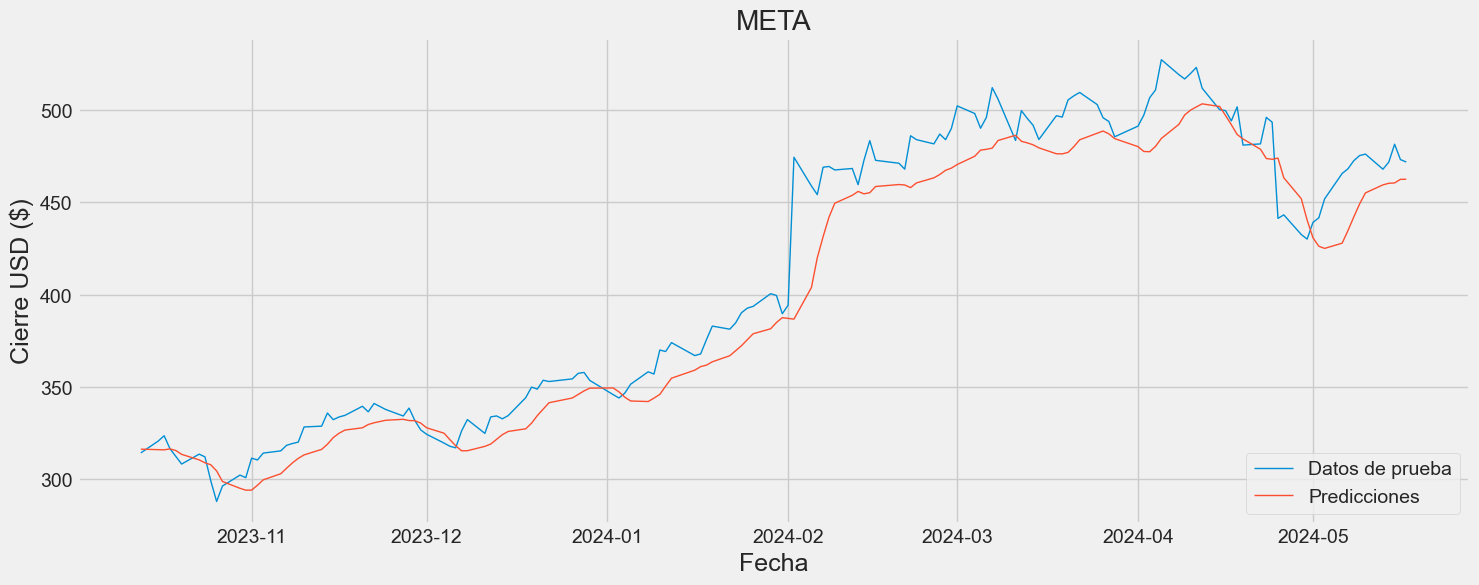

In [37]:
# Separar los datos de prueba
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Graficar los datos de prueba y las predicciones
plt.figure(figsize=(16, 6))
plt.title('META')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre USD ($)', fontsize=18)
plt.plot(valid['Adj Close'], linewidth=1, label='Datos de prueba')
plt.plot(valid['Predictions'], linewidth=1, label='Predicciones')
plt.legend(loc='lower right')
plt.show()

Predicción con XGBoost

In [132]:
df2 = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
Datos = df2.filter(["Date", "Adj Close"])
Datos.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2012-01-03,12.416985
2012-01-04,12.483712
2012-01-05,12.622309
2012-01-06,12.754258
2012-01-09,12.734030


In [133]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Calculamos la diferencia de precios como una nueva característica para conseguir una predicción más precisa
Datos['Price_Diff'] = Datos['Adj Close'].diff()

# Eliminamos la primera fila que contendría un valor NaN después del cálculo de la diferencia
datos = Datos.dropna()

# Separamos los datos en conjuntos de entrenamiento y prueba
training_data_len = int(len(datos) * 0.95)
training_data = datos.iloc[:training_data_len]
test_data = datos.iloc[training_data_len:]

# Convertimos las fechas en características numéricas
X_train = np.array(range(len(training_data))).reshape(-1, 1)
X_train = np.hstack((X_train, training_data['Price_Diff'].values.reshape(-1, 1)))
y_train = training_data['Adj Close'].values

# Iniciamos el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Definimos los parámetros a ajustar
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0,2],
    'n_estimators': [100, 200, 300, 400]
}

# Iniciamos el GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Realizamos la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo
best_model = grid_search.best_estimator_

# Convertimos las fechas de prueba en características numéricas
X_test = np.array(range(training_data_len, len(datos))).reshape(-1, 1)
X_test = np.hstack((X_test, test_data['Price_Diff'].values.reshape(-1, 1)))
y_test = test_data['Adj Close'].values

# Hacemos predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calculamos el RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Square Error (XGBoost):", rmse)

# Calcular el NRMSE
range_y = np.max(y_test) - np.min(y_test)
nrmse = rmse / range_y
print("Normalized Root Mean Square Error (XGBoost):", nrmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Root Mean Square Error (XGBoost): 11.093225389453506
Normalized Root Mean Square Error (XGBoost): 0.33807390467376586
Mean Absolute Error: 9.233179141313602
Coeficiente de determinación (R cuadrado): -0.5454802841811077


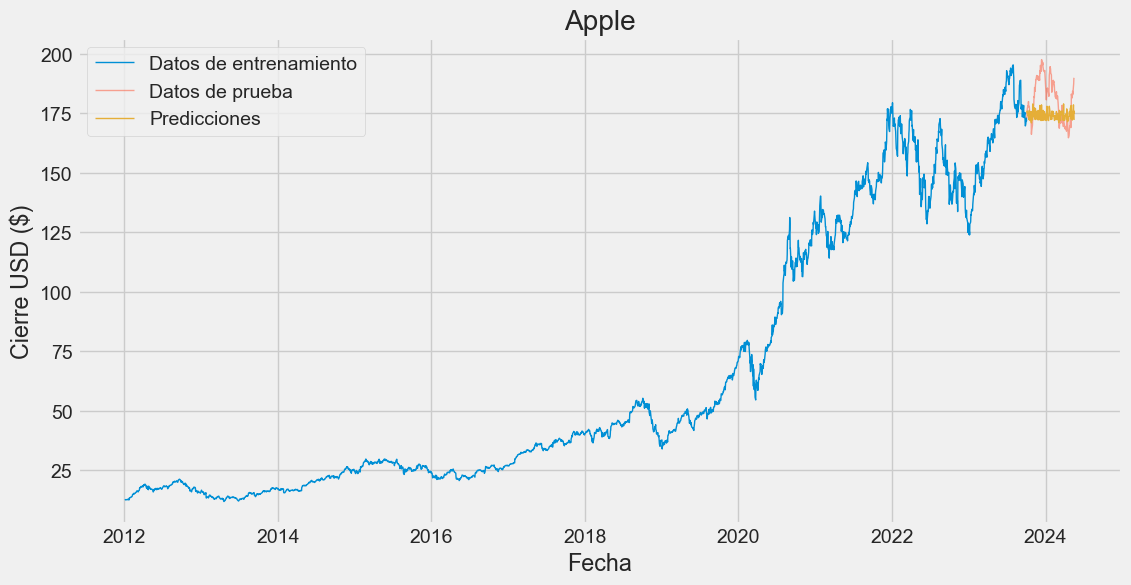

In [134]:
import matplotlib.pyplot as plt

# Graficamos los datos
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['Adj Close'], label='Datos de entrenamiento', linewidth = 1)
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth = 1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth = 1)
plt.title('Apple')
plt.xlabel('Fecha')
plt.ylabel('Cierre USD ($)')
plt.legend()
plt.grid(True)
plt.show()

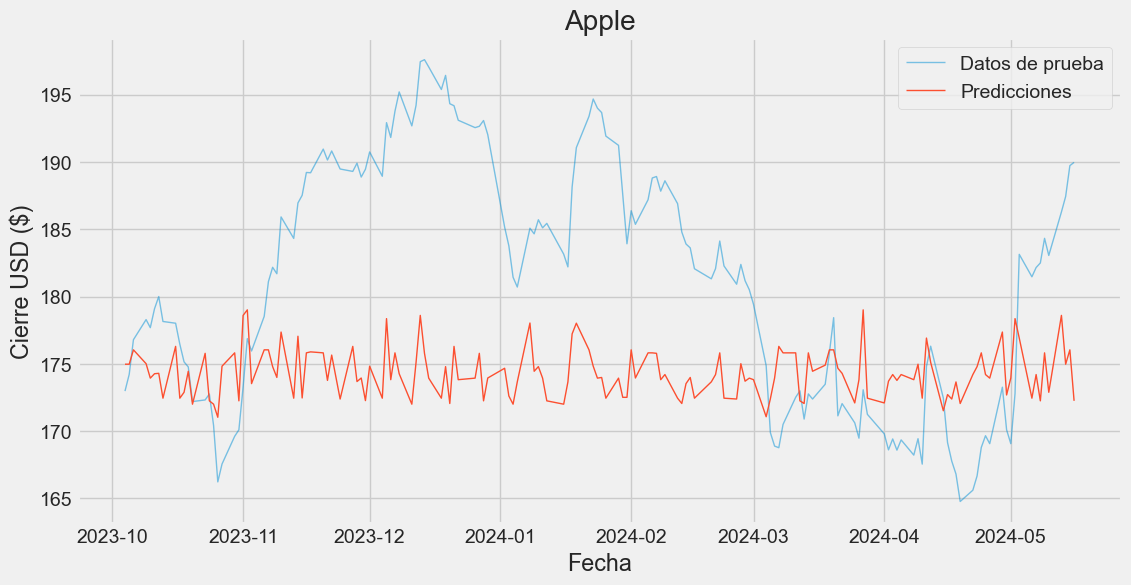

In [135]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth=1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth=1)
plt.title('Apple')
plt.xlabel('Fecha')
plt.ylabel('Cierre USD ($)')
plt.legend()
plt.grid(True)
plt.show()

In [136]:
df2 = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
Datos = df2.filter(["Date", "Adj Close"])
Datos.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2012-01-03,16.573130
2012-01-04,16.644611
2012-01-05,16.413727
2012-01-06,16.189817
2012-01-09,15.503389


In [137]:

import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Calculamos la diferencia de precios como una nueva característica para conseguir una predicción más precisa
Datos['Price_Diff'] = Datos['Adj Close'].diff()

# Eliminamos la primera fila que contendría un valor NaN después del cálculo de la diferencia
datos = Datos.dropna()

# Separamos los datos en conjuntos de entrenamiento y prueba
training_data_len = int(len(datos) * 0.95)
training_data = datos.iloc[:training_data_len]
test_data = datos.iloc[training_data_len:]

# Convertimos las fechas en características numéricas
X_train = np.array(range(len(training_data))).reshape(-1, 1)
X_train = np.hstack((X_train, training_data['Price_Diff'].values.reshape(-1, 1)))
y_train = training_data['Adj Close'].values

# Iniciamos el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Definimos los parámetros a ajustar
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0,2],
    'n_estimators': [100, 200, 300]
}

# Iniciamos el GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Realizamos la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo
best_model = grid_search.best_estimator_

# Convertimos las fechas de prueba en características numéricas
X_test = np.array(range(training_data_len, len(datos))).reshape(-1, 1)
X_test = np.hstack((X_test, test_data['Price_Diff'].values.reshape(-1, 1)))
y_test = test_data['Adj Close'].values

# Hacemos predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calculamos el RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Square Error (XGBoost):", rmse)

# Calcular el NRMSE
range_y = np.max(y_test) - np.min(y_test)
nrmse = rmse / range_y
print("Normalized Root Mean Square Error (XGBoost):", nrmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Root Mean Square Error (XGBoost): 15.776395795843193
Normalized Root Mean Square Error (XGBoost): 0.3003883626090438
Mean Absolute Error: 11.83697754297501
Coeficiente de determinación (R cuadrado): -0.8287643671716405


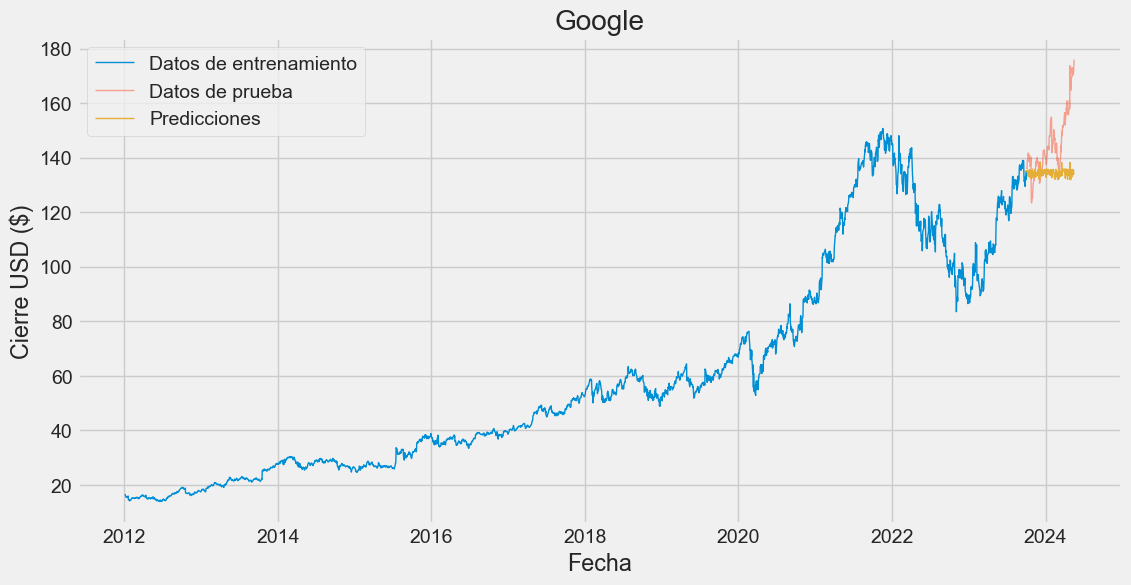

In [138]:

import matplotlib.pyplot as plt

# Graficamos los datos
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['Adj Close'], label='Datos de entrenamiento', linewidth = 1)
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth = 1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth = 1)
plt.title('Google')
plt.xlabel('Fecha')
plt.ylabel('Cierre USD ($)')
plt.legend()
plt.grid(True)
plt.show()

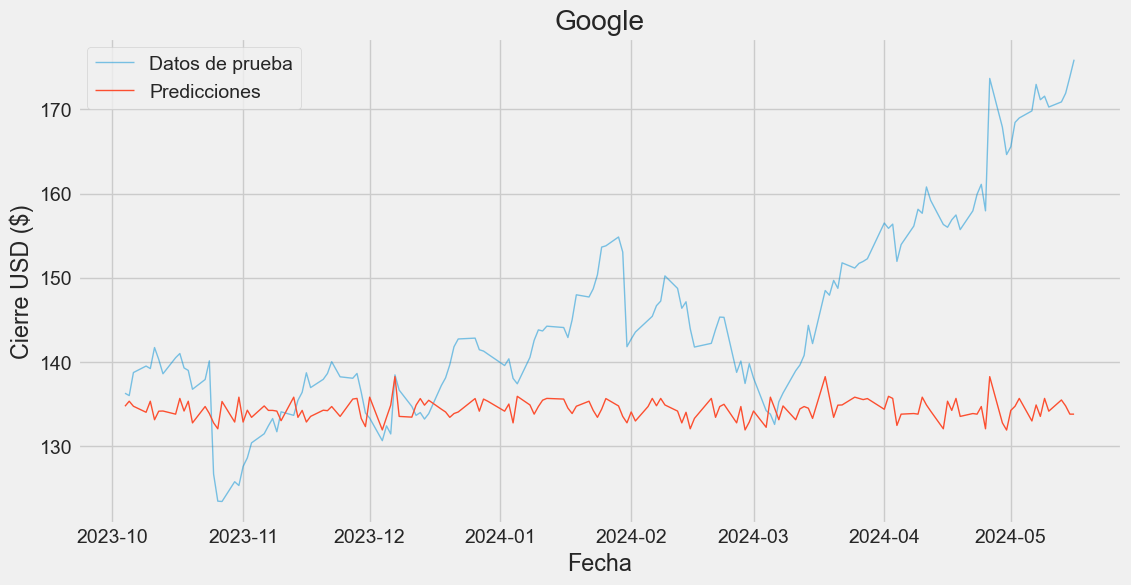

In [139]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth=1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth=1)
plt.title('Google')
plt.xlabel('Fecha')
plt.ylabel('Cierre USD ($)')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
df2 = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
Datos = df2.filter(["Date", "Adj Close"])
Datos.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2012-01-03,21.200516
2012-01-04,21.699440
2012-01-05,21.921190
2012-01-06,22.261724
2012-01-09,21.968702


In [143]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Calculamos la diferencia de precios como una nueva característica para conseguir una predicción más precisa
Datos['Price_Diff'] = Datos['Adj Close'].diff()

# Eliminamos la primera fila que contendría un valor NaN después del cálculo de la diferencia
datos = Datos.dropna()

# Separamos los datos en conjuntos de entrenamiento y prueba
training_data_len = int(len(datos) * 0.95)
training_data = datos.iloc[:training_data_len]
test_data = datos.iloc[training_data_len:]

# Convertimos las fechas en características numéricas
X_train = np.array(range(len(training_data))).reshape(-1, 1)
X_train = np.hstack((X_train, training_data['Price_Diff'].values.reshape(-1, 1)))
y_train = training_data['Adj Close'].values

# Iniciamos el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Definimos los parámetros a ajustar
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0,2],
    'n_estimators': [100, 200, 300]
}

# Iniciamos el GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Realizamos la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo
best_model = grid_search.best_estimator_

# Convertimos las fechas de prueba en características numéricas
X_test = np.array(range(training_data_len, len(datos))).reshape(-1, 1)
X_test = np.hstack((X_test, test_data['Price_Diff'].values.reshape(-1, 1)))
y_test = test_data['Adj Close'].values

# Hacemos predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calculamos el RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Square Error (XGBoost):", rmse)

# Calcular el NRMSE
range_y = np.max(y_test) - np.min(y_test)
nrmse = rmse / range_y
print("Normalized Root Mean Square Error (XGBoost):", nrmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Mejores hiperparámetros: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Root Mean Square Error (XGBoost): 72.83048199720946
Normalized Root Mean Square Error (XGBoost): 0.6535246335482785
Mean Absolute Error: 66.44710090832832
Coeficiente de determinación (R cuadrado): -4.853648411061348


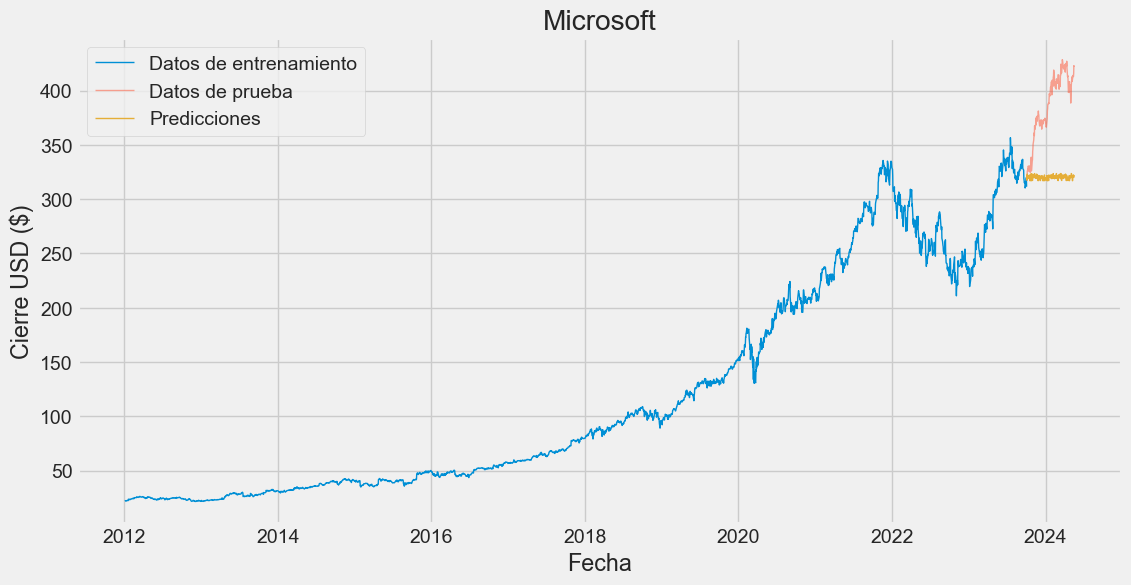

In [144]:

import matplotlib.pyplot as plt

# Graficamos los datos
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['Adj Close'], label='Datos de entrenamiento', linewidth = 1)
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth = 1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth = 1)
plt.title('Microsoft')
plt.xlabel('Fecha')
plt.ylabel('Cierre USD ($)')
plt.legend()
plt.grid(True)
plt.show()

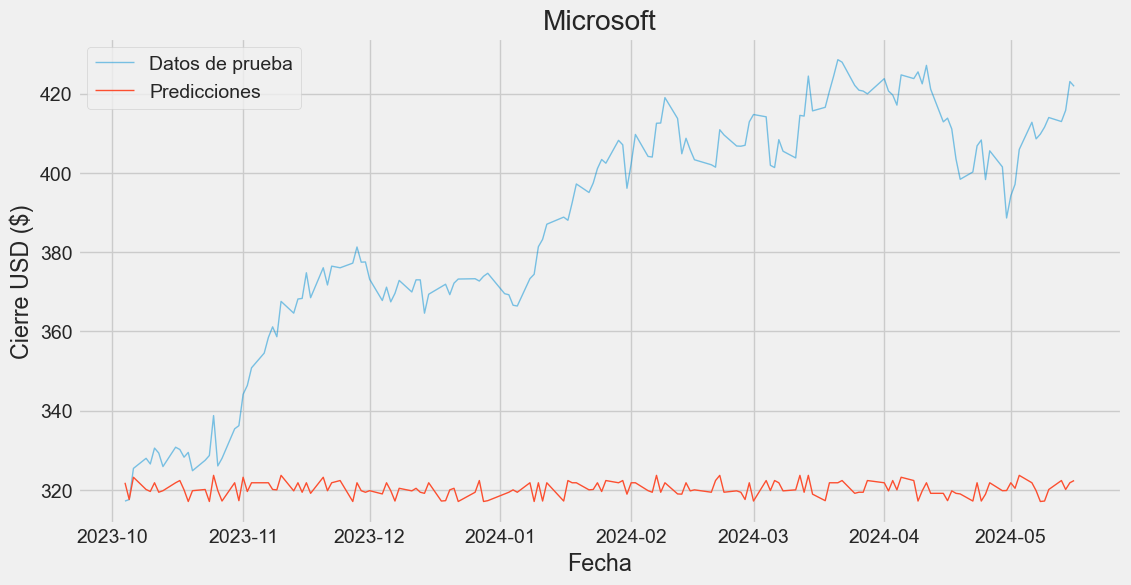

In [145]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth=1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth=1)
plt.title('Microsoft')
plt.xlabel('Fecha')
plt.ylabel('Cierre USD ($)')
plt.legend()
plt.grid(True)
plt.show()

In [146]:
df2 = pdr.get_data_yahoo('META', start='2012-01-01', end=datetime.now())
Datos = df2.filter(["Date", "Adj Close"])
Datos.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2012-05-18,38.189480
2012-05-21,33.993931
2012-05-22,30.967144
2012-05-23,31.966084
2012-05-24,32.994991


In [147]:

import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Calculamos la diferencia de precios como una nueva característica para conseguir una predicción más precisa
Datos['Price_Diff'] = Datos['Adj Close'].diff()

# Eliminamos la primera fila que contendría un valor NaN después del cálculo de la diferencia
datos = Datos.dropna()

# Separamos los datos en conjuntos de entrenamiento y prueba
training_data_len = int(len(datos) * 0.95)
training_data = datos.iloc[:training_data_len]
test_data = datos.iloc[training_data_len:]

# Convertimos las fechas en características numéricas
X_train = np.array(range(len(training_data))).reshape(-1, 1)
X_train = np.hstack((X_train, training_data['Price_Diff'].values.reshape(-1, 1)))
y_train = training_data['Adj Close'].values

# Iniciamos el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Definimos los parámetros a ajustar
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0,2, 1],
    'n_estimators': [100, 200, 300, 1100]
}

# Iniciamos el GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Realizamos la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo
best_model = grid_search.best_estimator_

# Convertimos las fechas de prueba en características numéricas
X_test = np.array(range(training_data_len, len(datos))).reshape(-1, 1)
X_test = np.hstack((X_test, test_data['Price_Diff'].values.reshape(-1, 1)))
y_test = test_data['Adj Close'].values

# Hacemos predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calculamos el RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Square Error (XGBoost):", rmse)

# Calcular el NRMSE
range_y = np.max(y_test) - np.min(y_test)
nrmse = rmse / range_y
print("Normalized Root Mean Square Error (XGBoost):", nrmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1100}
Root Mean Square Error (XGBoost): 130.3500841904394
Normalized Root Mean Square Error (XGBoost): 0.5447239924747002
Mean Absolute Error: 106.53563200085368
Coeficiente de determinación (R cuadrado): -1.9412845051687757


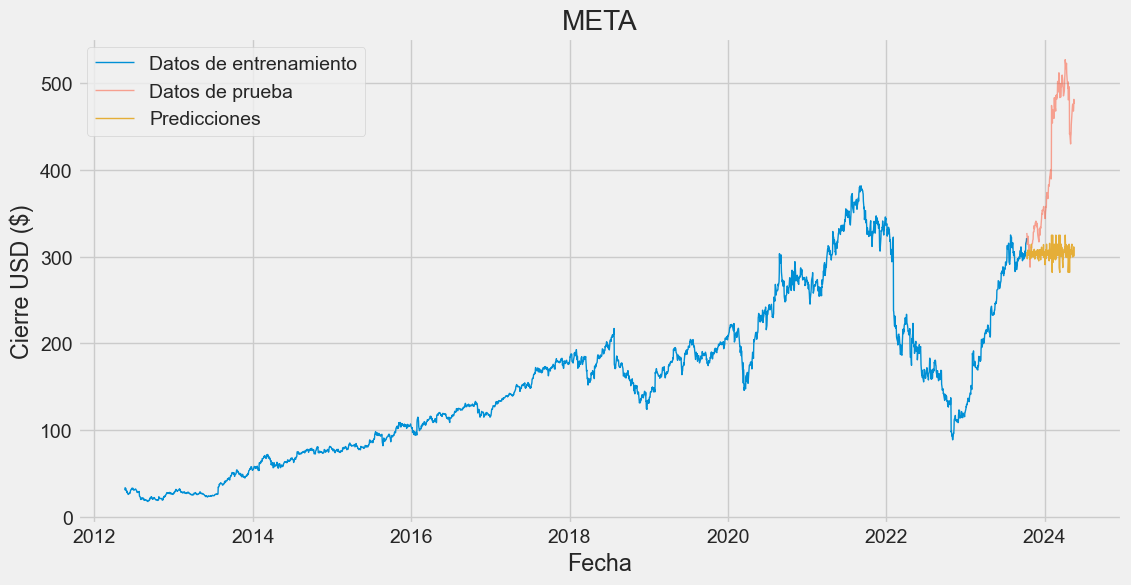

In [148]:

import matplotlib.pyplot as plt

# Graficamos los datos
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['Adj Close'], label='Datos de entrenamiento', linewidth = 1)
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth = 1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth = 1)
plt.title('META')
plt.xlabel('Fecha')
plt.ylabel('Cierre USD ($)')
plt.legend()
plt.grid(True)
plt.show()

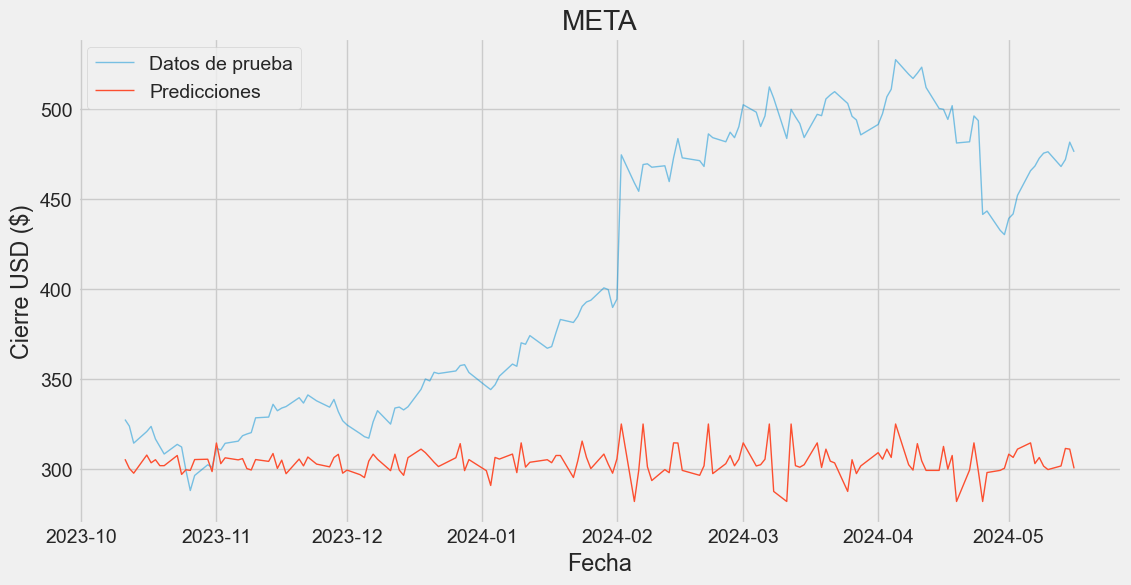

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth=1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth=1)
plt.title('META')
plt.xlabel('Fecha')
plt.ylabel('Cierre USD ($)')
plt.legend()
plt.grid(True)
plt.show()